# NGC 6946 Attenuation:
### This file NGC_6946_Nucleus_WHT_ISIS.fits has the data -> 
* from:            ~~~~  William Harcshel Telescope (WHT)
* detected by: ~~~~    ISIS (Interactive Spectral Interpretation System) spectograph
* for:        ~~~~        NGC 6946 Nucleus.
  
### Our goal is to evaluate Balmer Decrement ($\frac{H_{\alpha}}{H_{\beta}}$):
* Dust grains (heavy atoms) causes must of the light attenuation.
* Consider Hydrogen as a light lamp and the dust attenuate this light.

# Attenuation Calculation
THE WORKFLOW IN THIS FILE:
* Extract data from the file.
* Isolate $H_{\alpha}$ and $H_{\beta}$ emissions.
* Subtract the continum line.
* Integrate the area under the isolated region.
* Calculate the Attenuation.

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path_galaxy = "Bicocca-Tele.data/ngc_6946_for_29th_Sep_2025"

In [2]:
with fits.open(path_galaxy+ "/NGC_6946_Nucleus_WHT_ISIS.fits") as hdu_a:
    spec = hdu_a[0].data

wave = hdu_a[0].header['CRVAL1'] + np.arange(len(spec))*hdu_a[0].header['CD1_1']# WE HAVE CREATED VALUES OF WAVELENGTH FROM STANDARD DEFINITION IN THE HEADER

In [3]:
hdu_a[0].header["BUNIT"]

'erg/cm2/s/A'

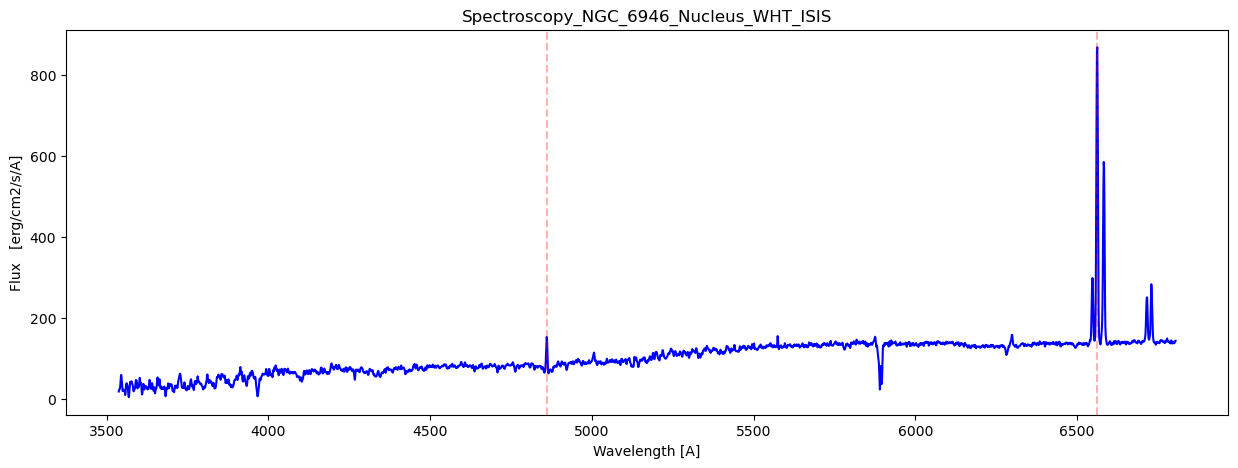

In [4]:
fig , ax = plt.subplots(figsize=(15,5))
ax.plot(wave,spec, color = 'blue')
ax.set_xlabel("Wavelength [A]")
ax.set_ylabel("Flux   [erg/cm2/s/A]")
ax.axvline(6562.81, color = 'red', linestyle ='--', alpha = 0.3)
ax.axvline(4861, color = 'red', linestyle ='--', alpha = 0.3)
ax.set_title("Spectroscopy_NGC_6946_Nucleus_WHT_ISIS")
plt.show()

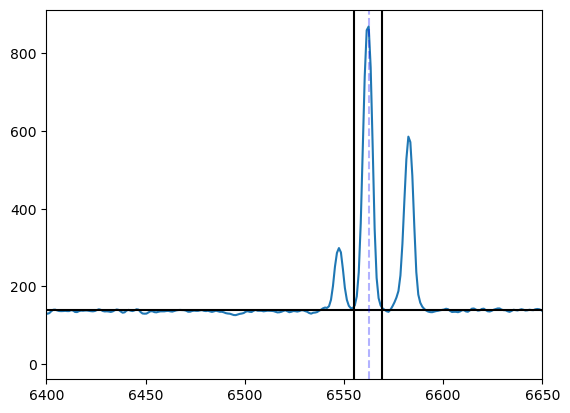

In [5]:
plt.plot(wave,spec)
plt.xlim(6400,6650)
plt.axhline(140, color = 'black')
plt.axvline(6555, color = 'black')
plt.axvline(6569, color = 'black')
plt.axvline(6562.81, color = 'blue', linestyle ='--', alpha = 0.3)
plt.show()

In [6]:
mask = (wave >= 6555) & (wave <= 6569)
sub_wavelength = wave[mask]
sub_flux = spec[mask]

# 2. Subtract the baseline (continuum)
clean_flux = sub_flux - 140

# 3. Calculate the area
H_a = np.trapezoid(clean_flux, sub_wavelength)
H_a

np.float64(4193.602996826172)

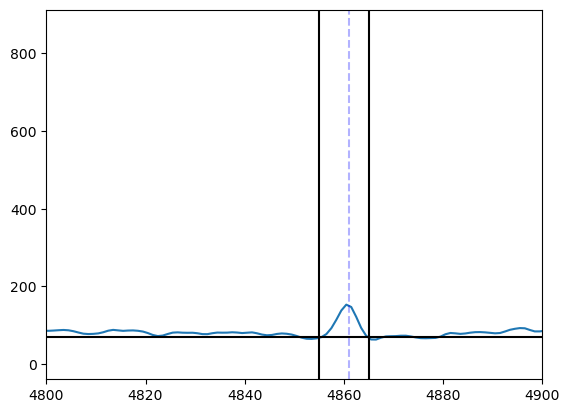

In [7]:
plt.plot(wave,spec)
plt.xlim(4800,4900)
plt.axhline(70, color = 'black')
plt.axvline(4855, color = 'black')
plt.axvline(4865, color = 'black')
plt.axvline(4861, color = 'blue', linestyle ='--', alpha = 0.3)
plt.show()

In [8]:
mask = (wave >= 4855) & (wave <= 4865)
sub_wavelength = wave[mask]
sub_flux = spec[mask]

# 2. Subtract the baseline (continuum)
clean_flux = sub_flux - 70

# 3. Calculate the area
H_b = np.trapezoid(clean_flux, sub_wavelength)
H_b

np.float64(379.4175262451172)

### NOTE THAT $H_{\beta}$ is much lower than $H_{\alpha}$ due to the wavelength difference.

In [9]:
H = H_a/H_b              # The ratio from the file.
E = 1.97*np.log(H/2.86)  # E is the color excess E(B-V)
A_r = 3.52*0.44*E        # Attentuation of the r filter, Remember that the 0.44 is to connect older galaxies to younger ones.
A_r 

np.float64(4.124698556599534)

In [12]:
H

np.float64(11.052739282573246)

In [10]:
A_g = 4.69*0.44*E
A_g

np.float64(5.495692110923811)